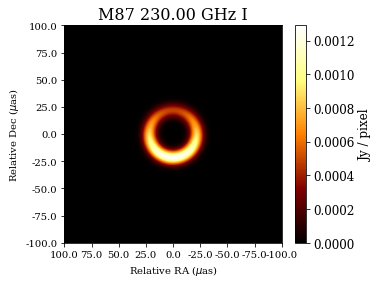

Generating empty observation file . . . 
Producing clean visibilities from image with nfft FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 


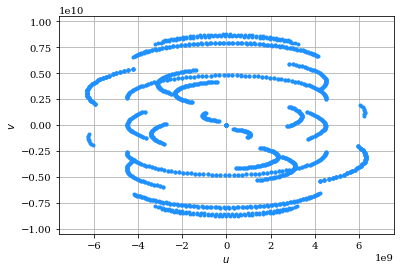

In [37]:
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import ehtim as eh
from ehtim.observing.obs_helpers import fft_imvec
from   ehtim.calibrating import self_cal as sc

# parameters for model image
npix = 128
fov = 200*eh.RADPERUAS
source = 'M87'
ra = 19.414182210498385
dec = -29.24170032236311
zbl = 0.8
rf = 230000000000.0
mjd = 57854

ring_radius = 22*eh.RADPERUAS # the radius of the ring
ring_width = 10*eh.RADPERUAS # the width of the ring
nonun_frac = 0.5 # defines how much brighter the brighter location is on the ring
theta_nonun_rad = 270 # defines the angle of the brightest location

# Create image from adding a ring to an empty image
im = eh.image.make_empty(npix, fov, ra, dec, rf=rf, source=source, mjd=mjd)
im = im.add_ring_m1(zbl, nonun_frac, ring_radius, theta_nonun_rad * np.pi/180., ring_width)

# Use 2017 telescope array
eht = eh.array.load_txt('arrays/EHT2017.txt')

# Look at the image
im.display()

# Observe the image
tint_sec = 1000
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e10
obs = im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 add_th_noise=False)
obs.plotall('u','v', conj=True)

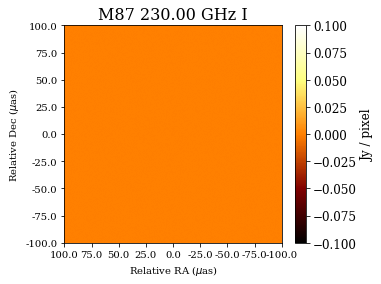

Generating empty observation file . . . 
Producing clean visibilities from image with nfft FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 


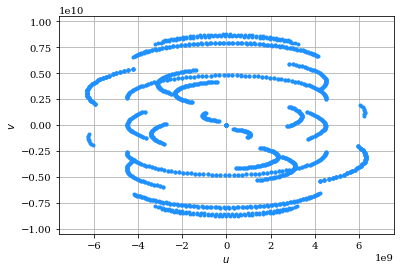

In [38]:
# Note: this is an example sequence of commands to run in ipython
# The matplotlib windows may not open/close properly if you run this directly as a script

from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import ehtim as eh
from   ehtim.calibrating import self_cal as sc
#from  ehtim.plotting import self_cal as sc

# Load the image and the array
# parameters for model image
npix = 128
fov = 200*eh.RADPERUAS
source = 'M87'
ra = 19.414182210498385
dec = -29.24170032236311
zbl = 0.8
rf = 230000000000.0
mjd = 57854

ring_radius = 2*eh.RADPERUAS # the radius of the ring
ring_width = 1*eh.RADPERUAS # the width of the ring
nonun_frac = 0.5 # defines how much brighter the brighter location is on the ring
theta_nonun_rad = 270 # defines the angle of the brightest location

im = eh.image.make_empty(npix, fov, ra, dec, rf=rf, source=source, mjd=mjd)
#im = im.add_crescent(1.0, 25.*eh.RADPERUAS,20.*eh.RADPERUAS, 0, 0)
eht = eh.array.load_txt('arrays/EHT2017.txt')
# Look at the image
im.display()

# Observe the image
# tint_sec is the integration time in seconds, and tadv_sec is the advance time between scans
# tstart_hr is the GMST time of the start of the observation and tstop_hr is the GMST time of the end
# bw_hz is the  bandwidth in Hz
# sgrscat=True blurs the visibilities with the Sgr A* scattering kernel for the appropriate image frequency
# ampcal and phasecal determine if gain variations and phase errors are included
tint_sec = 1000
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e10
obs = im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 add_th_noise=False)
obs.plotall('u','v', conj=True)

In [39]:
# Note: this is an example sequence of commands to run in ipython
# The matplotlib windows may not open/close properly if you run this directly as a script

from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import h5py
import ehtim as eh
from   ehtim.calibrating import self_cal as sc

data_to_write = np.random.random(size=(100,20)) 
with h5py.File('test1.h5', 'w') as hf:
    hf.create_dataset("test1",  data=data_to_write)
    
im = eh.image.load_image('test1.h5')
eht = eh.array.load_txt('arrays/EHT2017.txt')
# Look at the image
im.display()

# Observe the image
# tint_sec is the integration time in seconds, and tadv_sec is the advance time between scans
# tstart_hr is the GMST time of the start of the observation and tstop_hr is the GMST time of the end
# bw_hz is the  bandwidth in Hz
# sgrscat=True blurs the visibilities with the Sgr A* scattering kernel for the appropriate image frequency
# ampcal and phasecal determine if gain variations and phase errors are included
tint_sec = 1000
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e10
obs = im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 add_th_noise=False)
obs.plotall('u','v', conj=True)

Image format is not recognized. Was expecting .fits, .txt, or Image. Got <.h5>. Returning False.


AttributeError: 'bool' object has no attribute 'display'